# Exploratory Data Analysis - ENEM DATASET

This notebook plots descriptive statistics and distributions for the ENEM dataset.
Only human data here -- no LLMs.

Exam codes:

### CH - Humanities
### CN - Natural Sciences
### MT - Math
### LC - Languages


In [2]:
# jupyter nbconvert --no-input --to pdf enem-eda-humans.ipynb

palette = ["red", "purple", "blue", "green"]

notebook_type = 'H'
figure_count = 1

In [3]:
# jupyter nbconvert --no-input --to pdf kdd.ipynb
# HUMANS CTT and IRT data
from read_functions import read_human_data

dic_human_scores, dic_human_itens, dic_average_human_thetas_df = read_human_data()


### Distribution of Classical Test Theory (CTT) scores by year and exam 

Maximum score is 45.

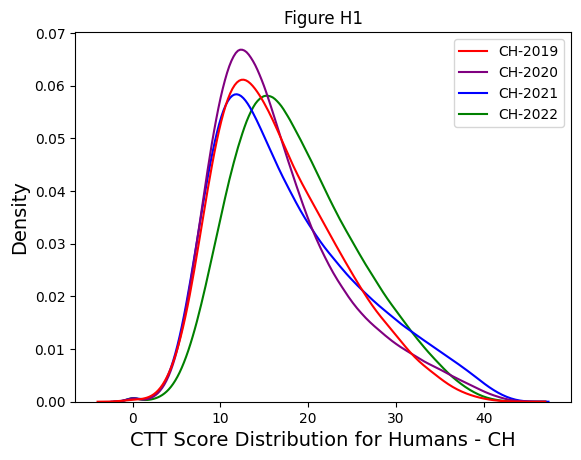

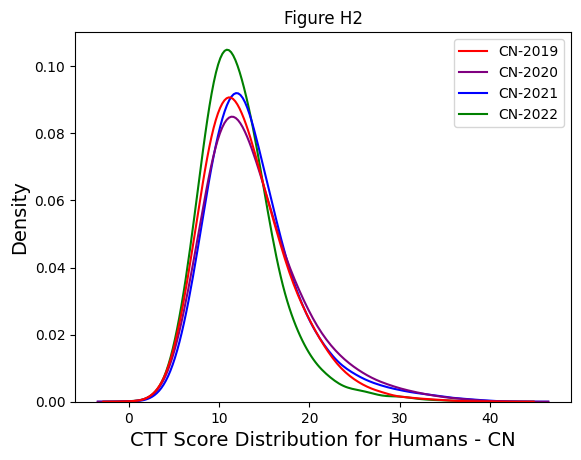

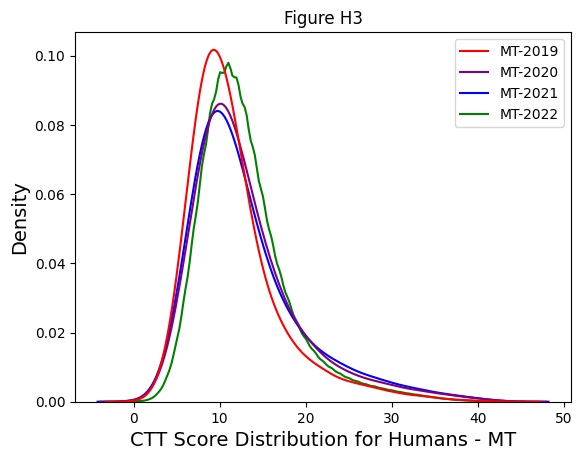

<Figure size 640x480 with 0 Axes>

In [3]:
# HUMAN - Distribuição CTTs - CH

import matplotlib.pyplot as plt
import seaborn as sns

for exam in ['CH', 'CN', 'MT']:
    curves = {}
    for year in [2019, 2020, 2021, 2022]:
        curves[f'{exam}-{year}'] = dic_human_scores[exam][year]['CTT_SCORE']
        
    g = sns.kdeplot(
        curves,
        bw_adjust=1.8,
        common_norm=False,  # Normalize each distribution independently
        palette=palette,
    );

    _ = plt.title('Figure ' + notebook_type + str(figure_count))
    _ = plt.xlabel(f"CTT Score Distribution for Humans - {exam}", fontsize=14)
    _ = plt.ylabel("Density", fontsize=14)
    _ = plt.show()
    _ = plt.savefig(f'figures/dist-human-{exam}-ctt-scores.pdf', format='pdf',bbox_inches='tight')

    figure_count += 1


### Distribution of Item-Response Theory (IRT) scores by year and exam 

ENEM organizers do not report the original theta to students; they would get confused about receiving negative grades.
The do a linear transformation and grades range from 400-1000.


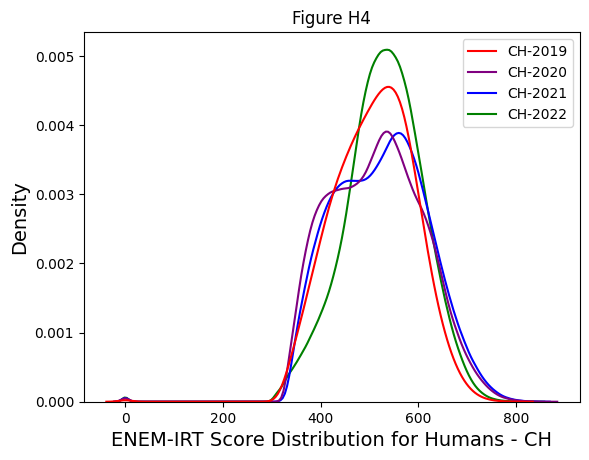

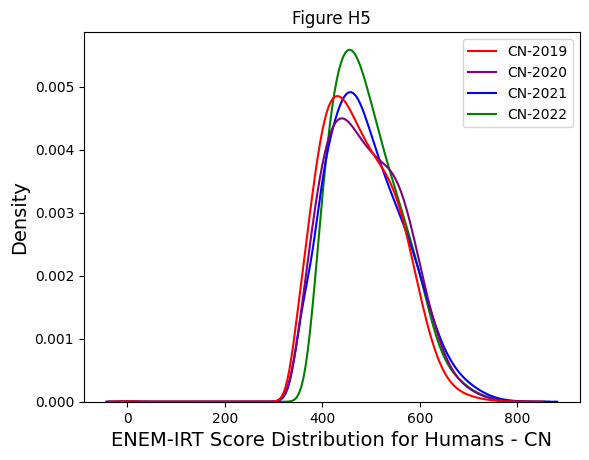

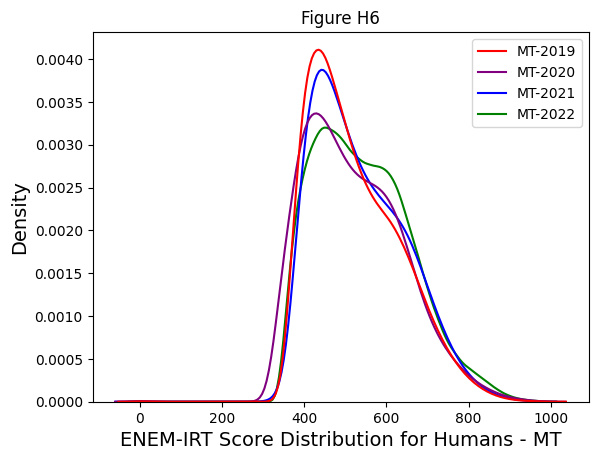

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

for exam in ['CH', 'CN', 'MT']:
    curves = {}
    for year in [2019, 2020, 2021, 2022]:
        curves[f'{exam}-{year}'] = dic_human_scores[exam][year]['ENEM_IRT_SCORE']
   
    g = sns.kdeplot(
        curves,
        bw_adjust=1.5,
        common_norm=False,  # Normalize each distribution independently
        palette=palette,
    )

    _ = plt.title('Figure ' + notebook_type + str(figure_count))
    _ = plt.xlabel(f"ENEM-IRT Score Distribution for Humans - {exam}", fontsize=14)
    _ = plt.ylabel("Density", fontsize=14)
    plt.show()
    plt.savefig(f'figures/dist-human-{exam}-enem-irt-scores.pdf', format='pdf',bbox_inches='tight')

    figure_count += 1



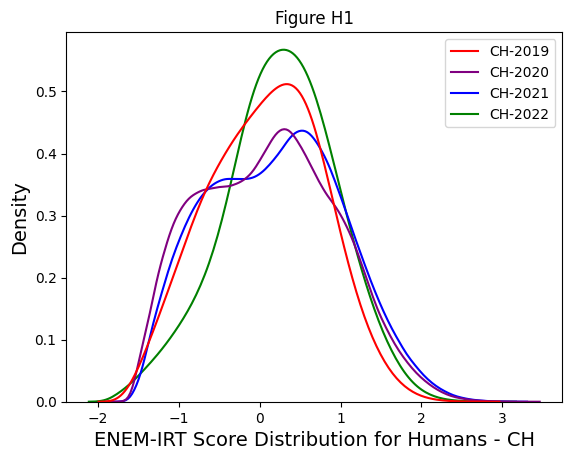

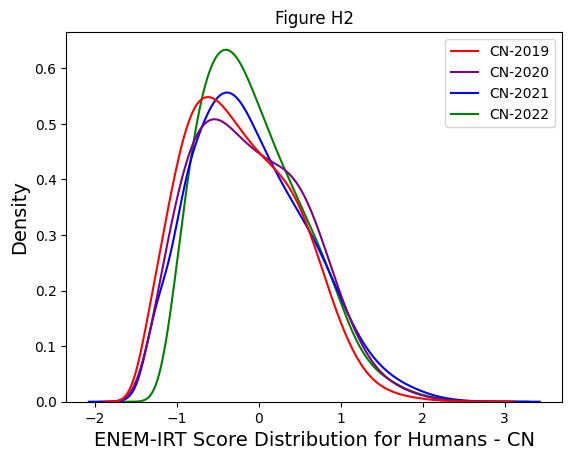

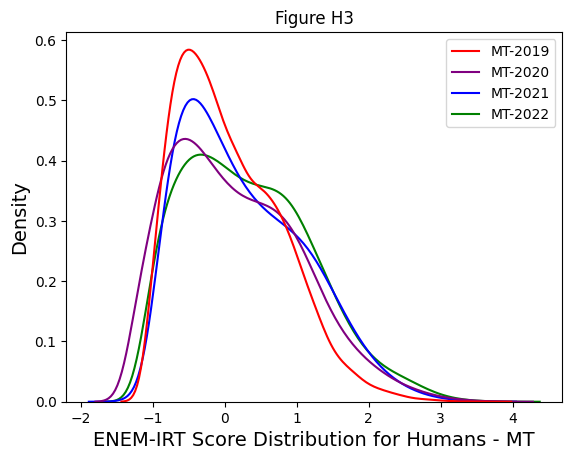

KeyError: 2019

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

for exam in ['CH', 'CN', 'MT','LC']:
    curves = {}
    for year in [2019, 2020, 2021, 2022]:
        curves[f'{exam}-{year}'] = dic_human_scores[exam][year]['IRT_SCORE']
   
    g = sns.kdeplot(
        curves,
        bw_adjust=1.5,
        common_norm=False,  # Normalize each distribution independently
        palette=palette,
    )

    _ = plt.title('Figure ' + notebook_type + str(figure_count))
    _ = plt.xlabel(f"ENEM-IRT Score Distribution for Humans - {exam}", fontsize=14)
    _ = plt.ylabel("Density", fontsize=14)
    plt.show()
    plt.savefig(f'figures/dist-human-{exam}-irt-scores.pdf', format='pdf',bbox_inches='tight')

    figure_count += 1



We don't want to work with ENEM-IRT scores in the range 400-1000 because that's not what the original IRT model produces and hence comparison with LLMs will not be straightforward.

We then use the R library mirt to infer the thetas given the ENEM IRT item params.

Rank correlation is high except for Math 2019, which must be double-checked.


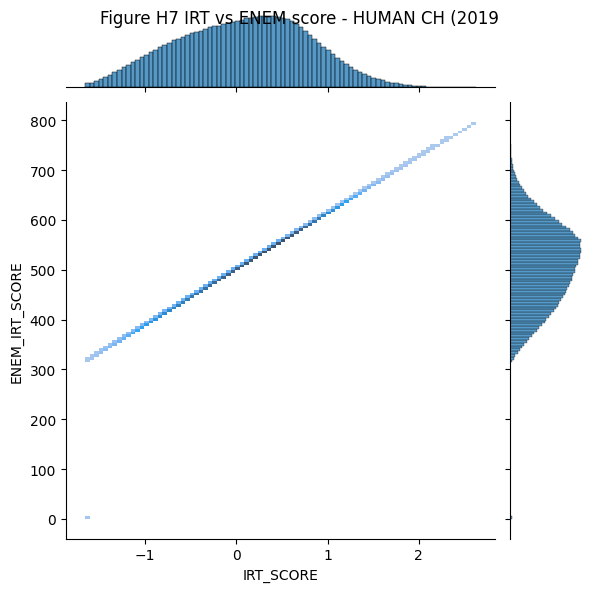

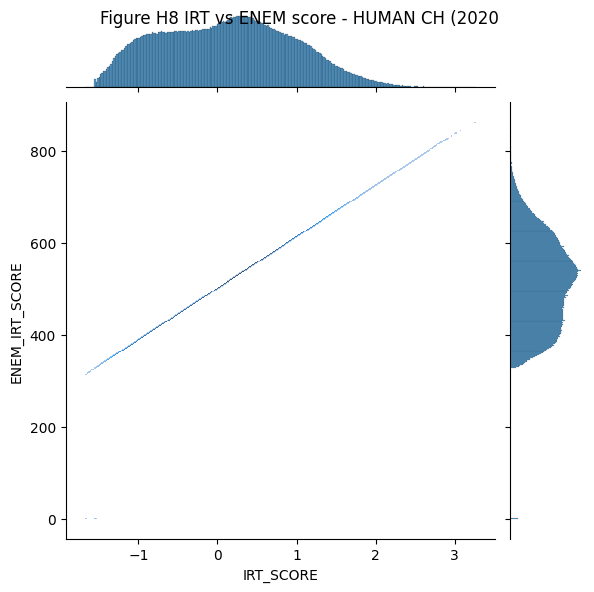

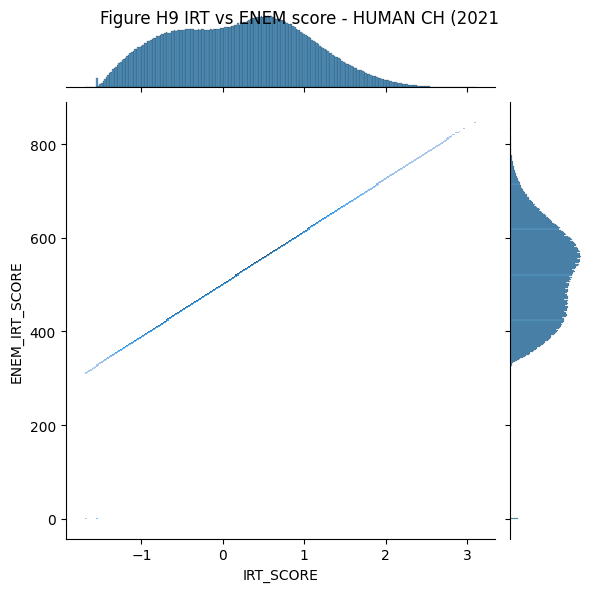

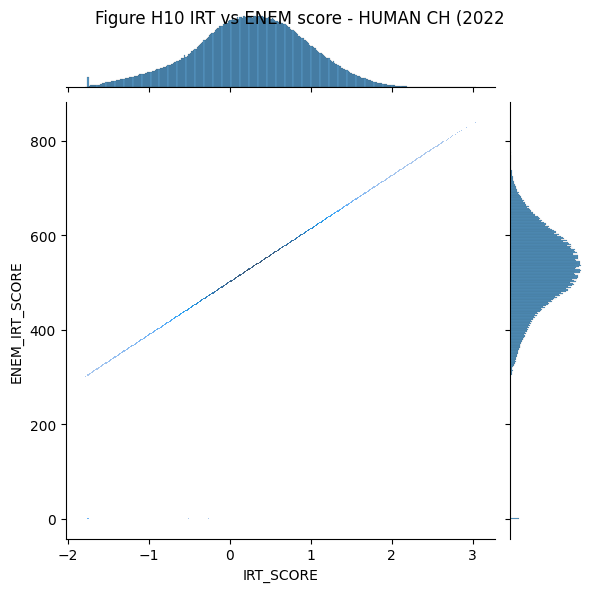

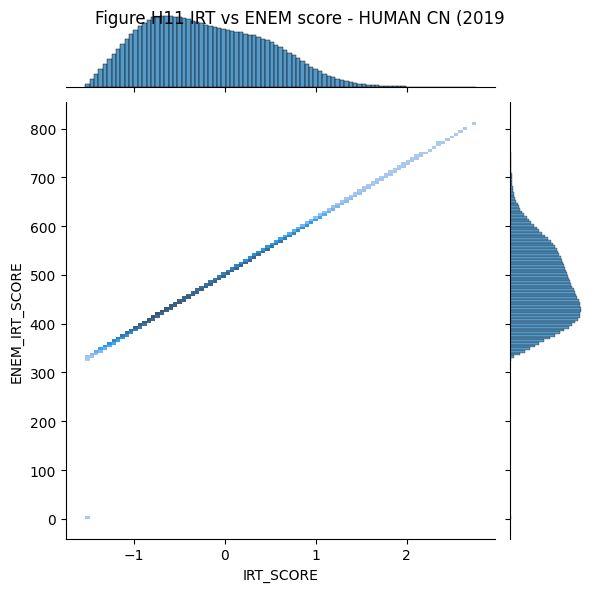

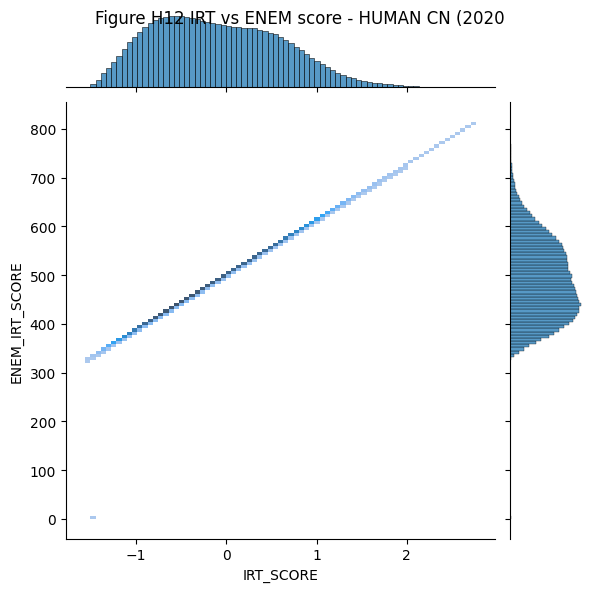

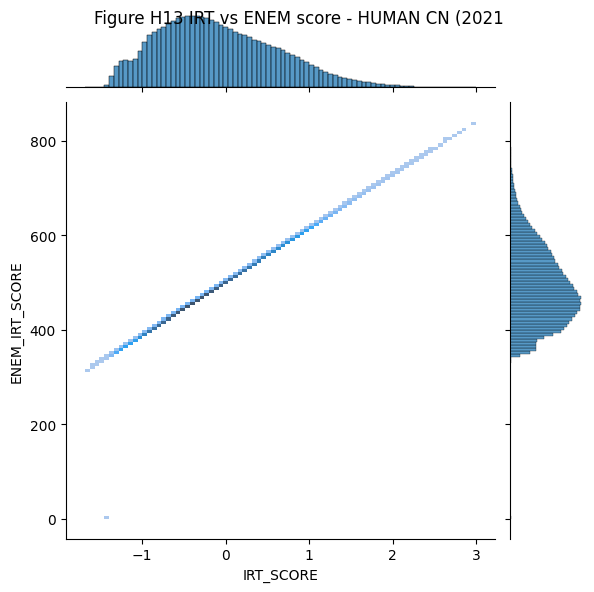

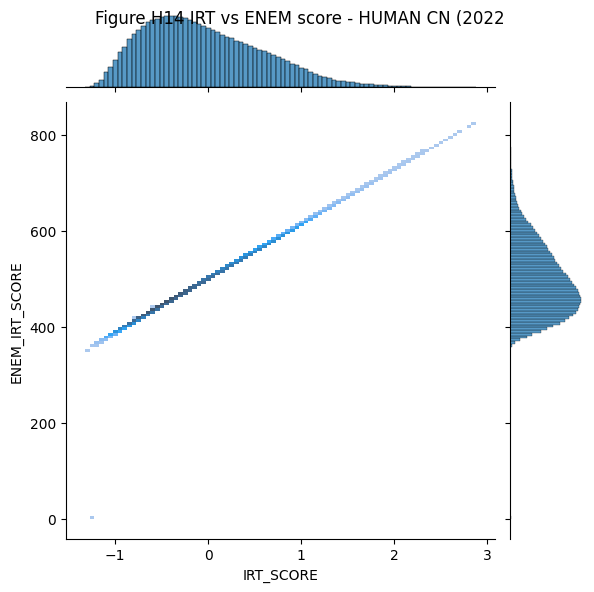

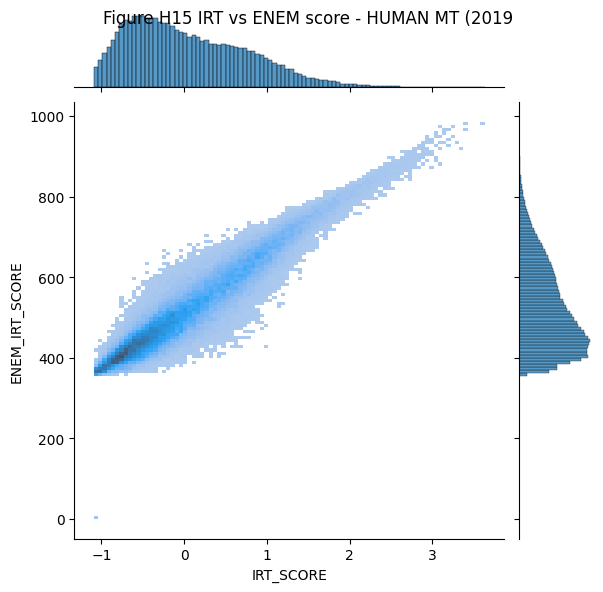

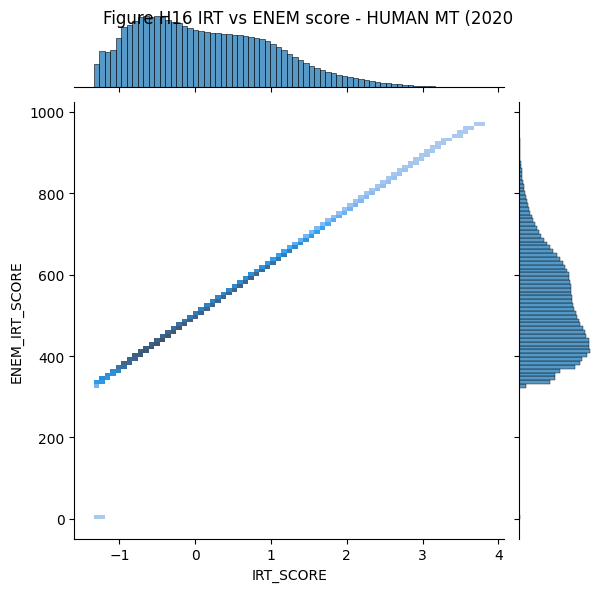

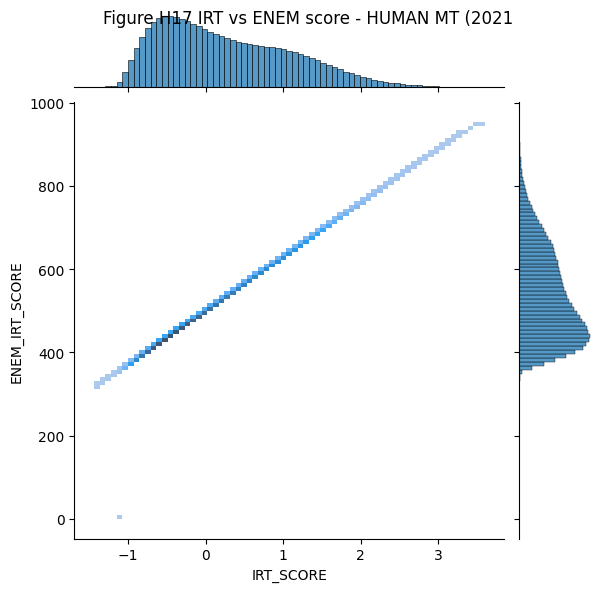

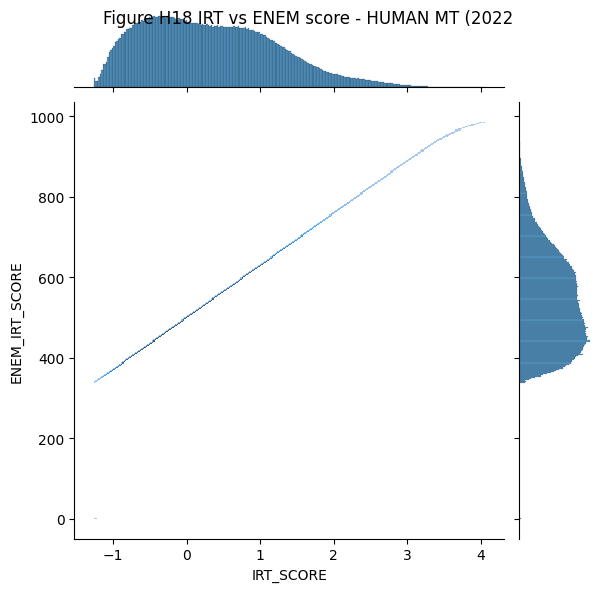

In [5]:
import seaborn as sns

for exam in ['CH', 'CN', 'MT']:
    for year in [2019, 2020, 2021, 2022]:
    
        g = sns.jointplot(data=dic_human_scores[exam][year], x="IRT_SCORE", y="ENEM_IRT_SCORE", kind="hist")
        _ = plt.suptitle('Figure ' + notebook_type + str(figure_count) + f" IRT vs ENEM score - HUMAN {exam} ({year}")
        _ = plt.show()
        figure_count += 1




Compare human CTT scores with IRT scores.


Confirms 3 benefits of IRT.

Benefit 1: Students with the same CTT score can get different grades because they got different itens correct.

Benefit 2: A student with a lower CTT score can get a higher IRT score than another student.

Benefit 3: IRT scores are more fine-grained. Compare the number of CTT bars vs IRT bars.


Figure H19


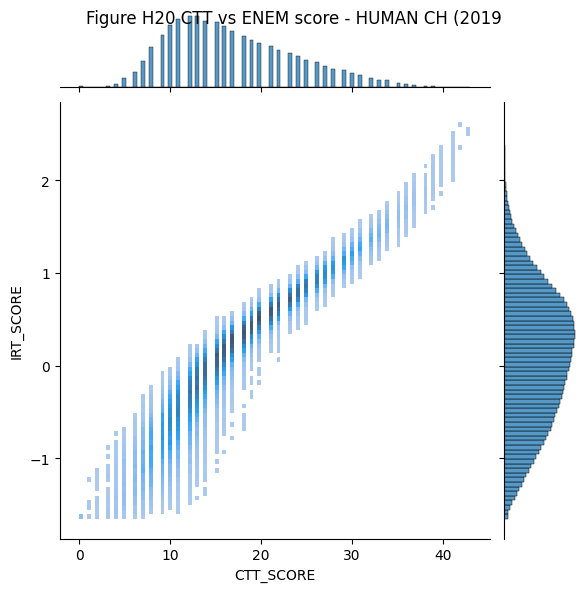

Figure H20


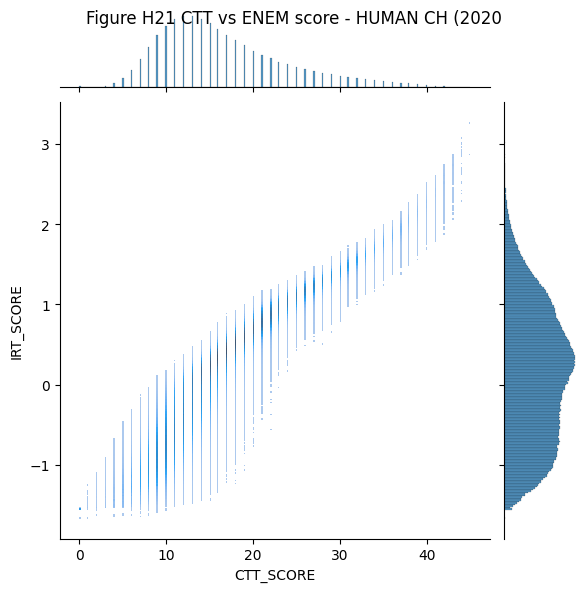

Figure H21


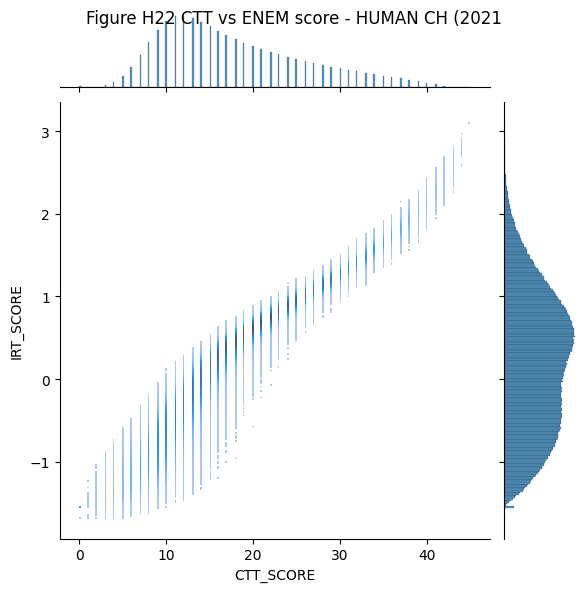

Figure H22


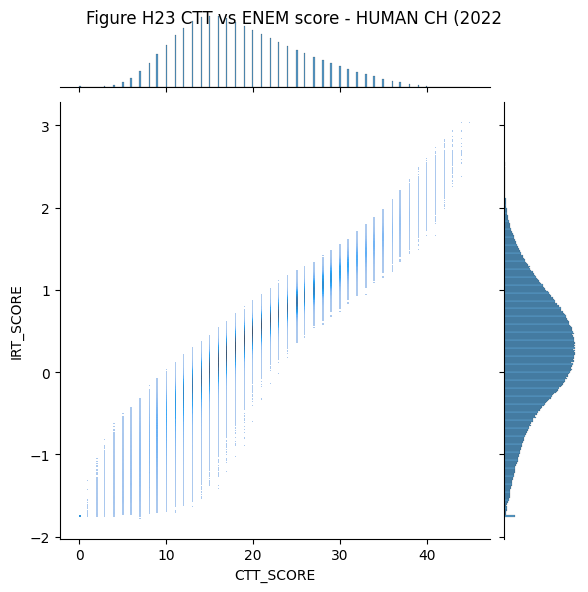

Figure H23


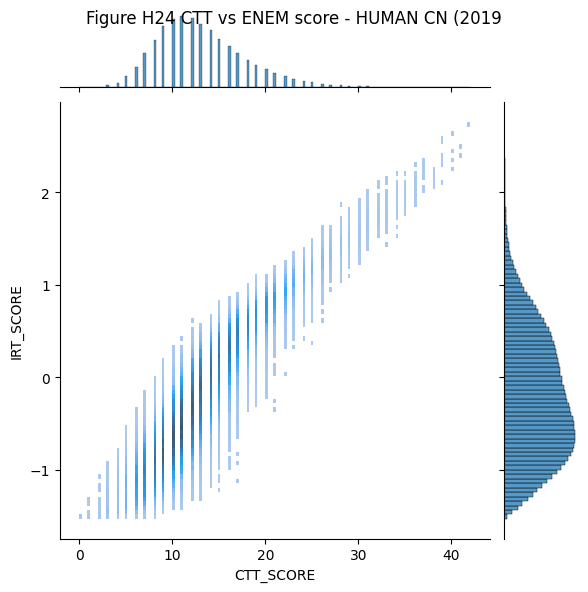

Figure H24


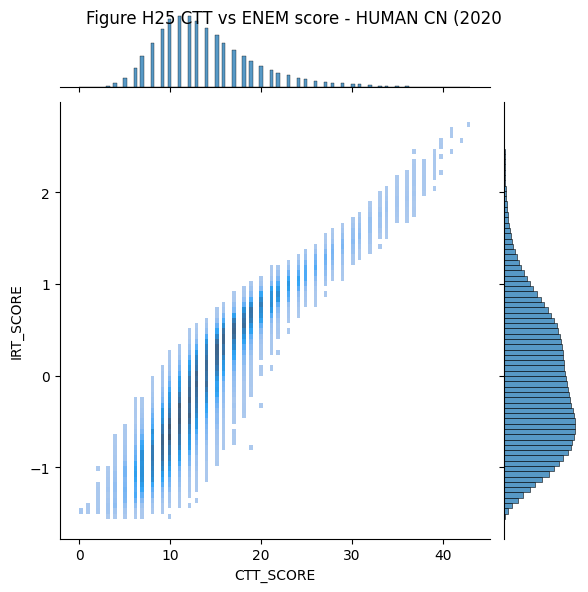

Figure H25


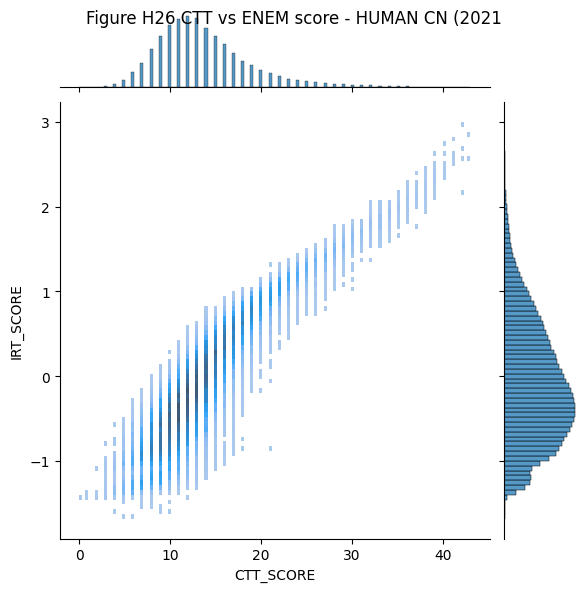

Figure H26


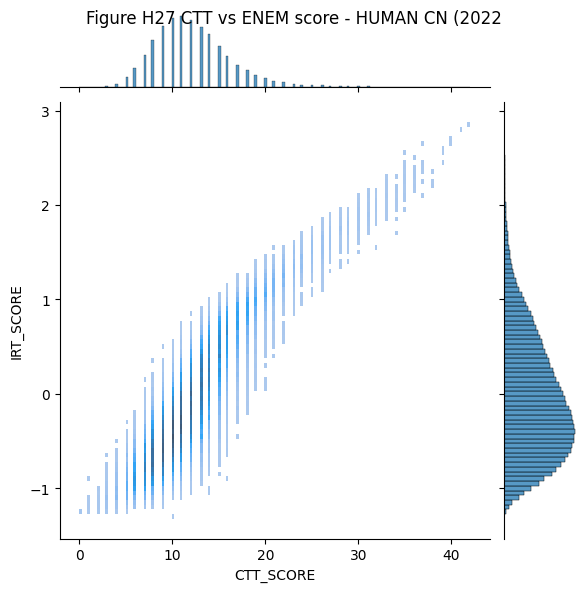

Figure H27


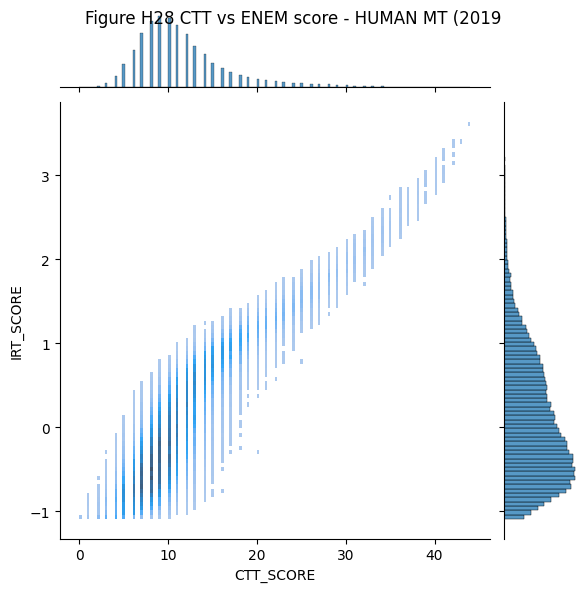

Figure H28


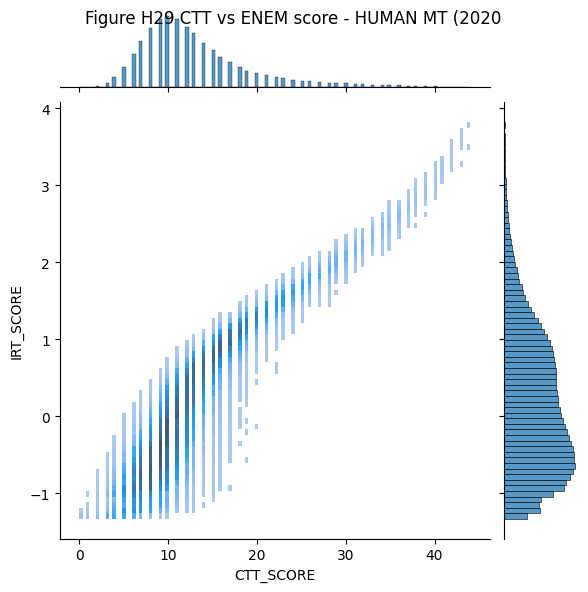

Figure H29


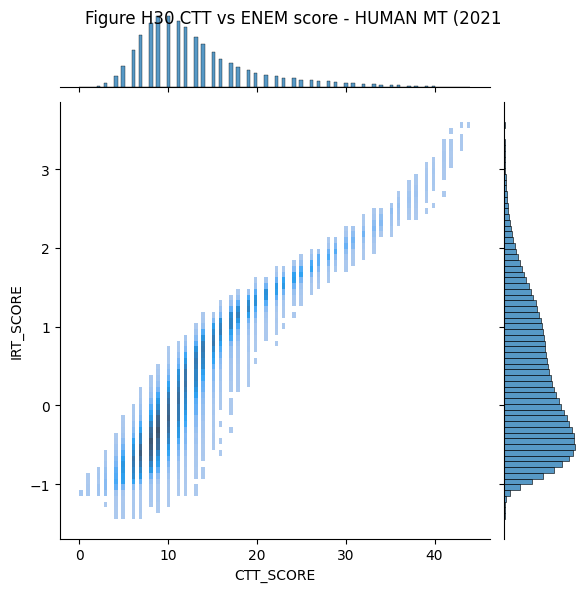

Figure H30


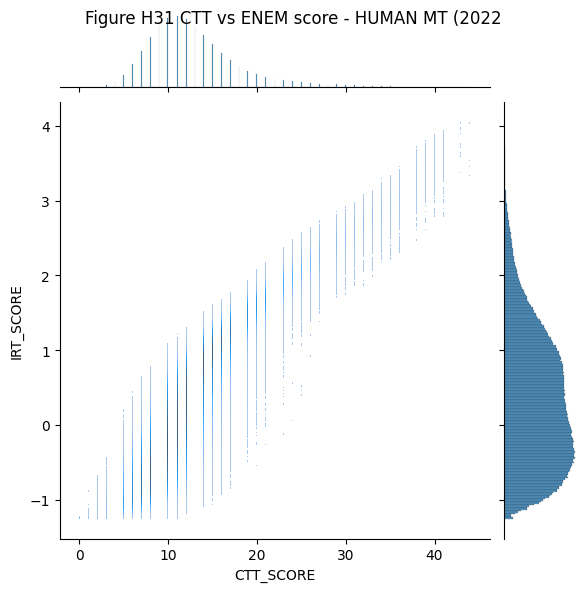

In [6]:
# HUMAN: CTT SCORE vs IRT SCORE
# This analysis is similar to https://www1.folha.uol.com.br/educacao/2021/11/candidato-do-enem-comece-sempre-pelas-perguntas-faceis.shtml.
import seaborn as sns

for exam in ['CH', 'CN', 'MT']:
    for year in [2019, 2020, 2021, 2022]:

        print('Figure', notebook_type + str(figure_count))
        figure_count += 1
        
        g = sns.jointplot(data=dic_human_scores[exam][year], x="CTT_SCORE", y="IRT_SCORE", kind="hist")
        _ = plt.suptitle('Figure ' + notebook_type + str(figure_count) + f" CTT vs ENEM score - HUMAN {exam} ({year}")
        plt.show()



Descriptive statistics for CTT-SCORE, ENEM-IRT score and IRT-SCORE

In [7]:
for exam in ['CH', 'CN', 'MT']:
    for year in [2019, 2020, 2021, 2022]:

        dic_human_scores[exam][year][['CTT_SCORE', 'ENEM_IRT_SCORE','IRT_SCORE']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

%config InteractiveShell.ast_node_interactivity = 'all'


Sanity check that item param B (Difficulty) makes sense.

We correlate it with the accuracy for students in the 75-100 quartile.

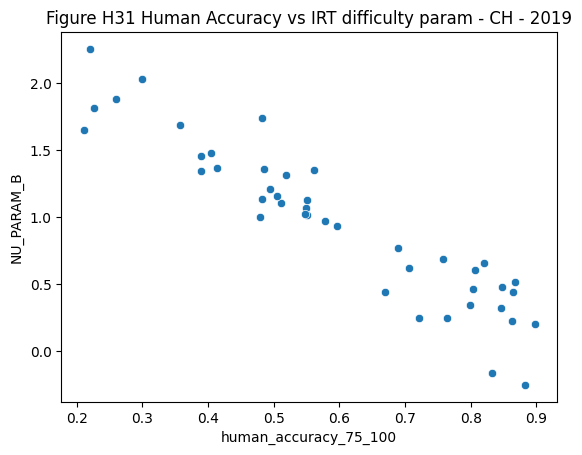

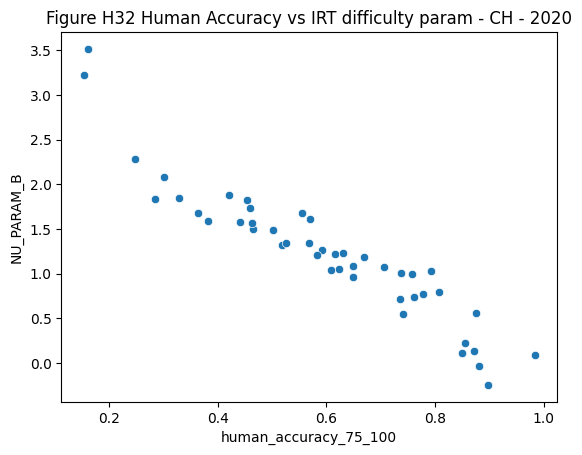

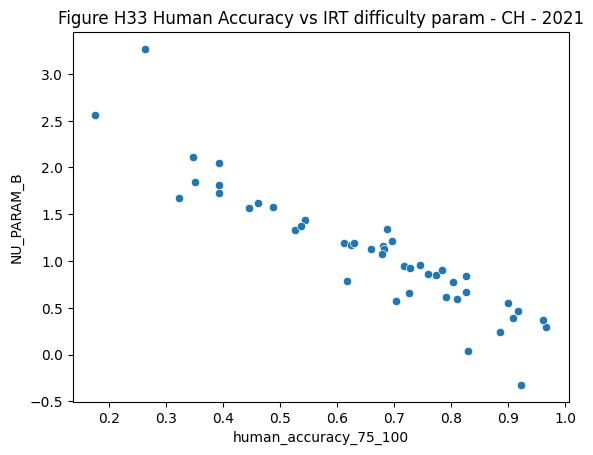

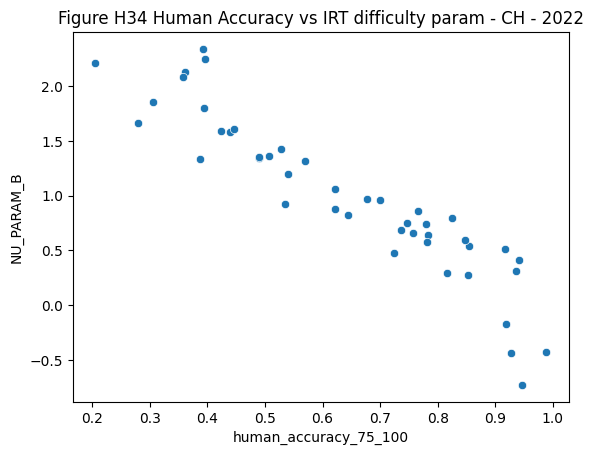

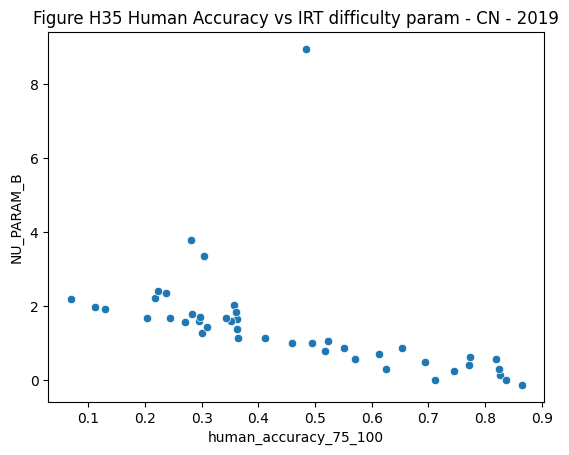

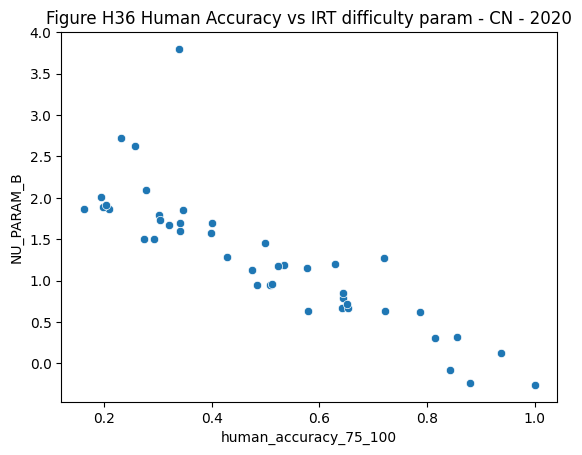

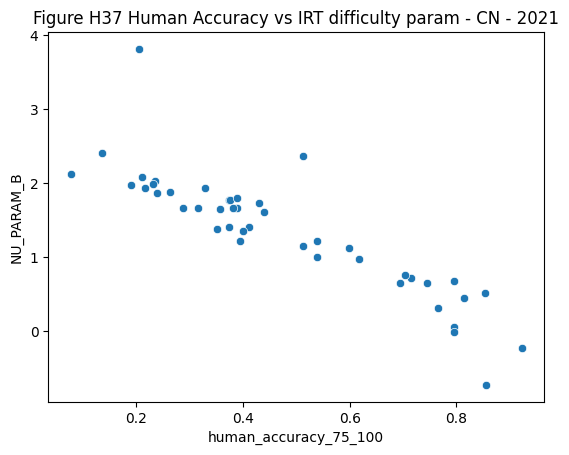

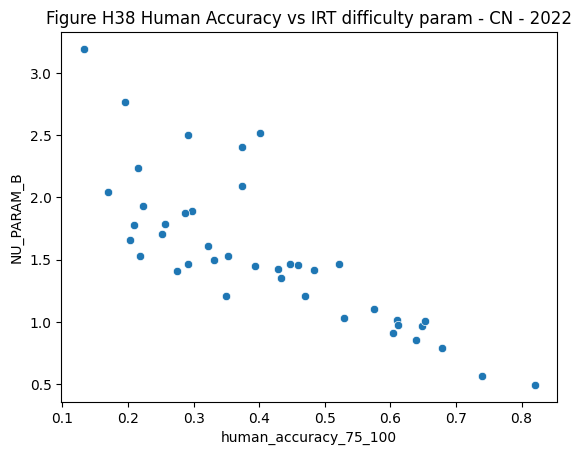

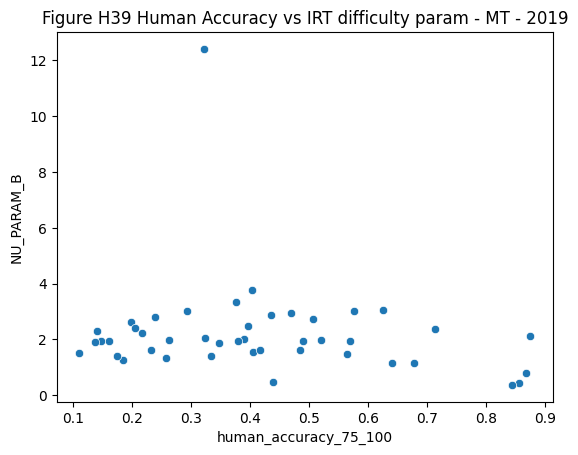

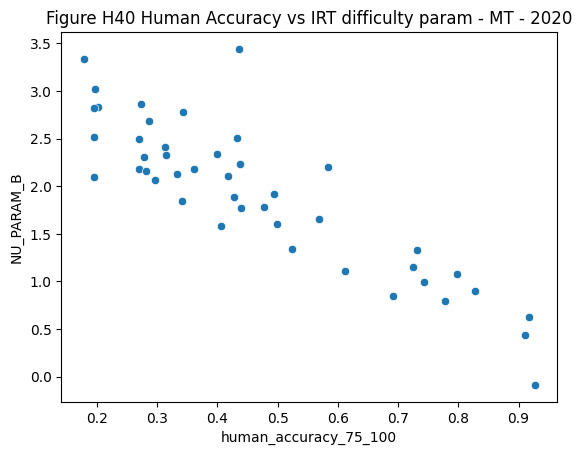

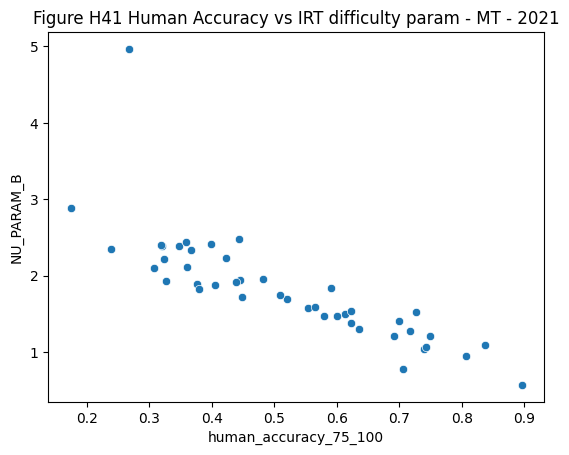

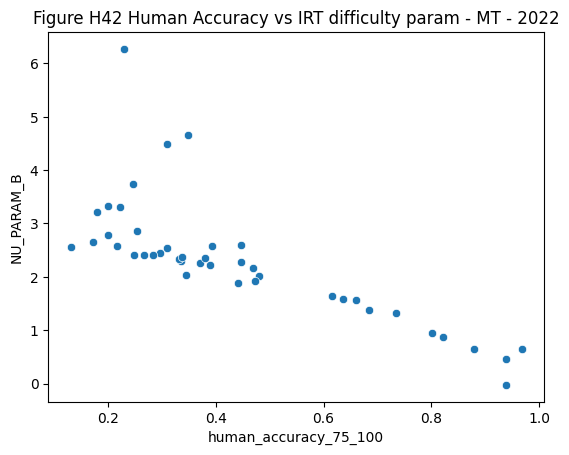

In [8]:
# HUMAN - correlations
import matplotlib.pyplot as plt

for exam in ['CH', 'CN', 'MT']:
    for year in [2019, 2020, 2021, 2022]:        
         _ = sns.scatterplot(x=dic_human_itens[exam][year]['human_accuracy_75_100'], y=dic_human_itens[exam][year]['NU_PARAM_B'])
         _ = plt.title("Figure " + notebook_type + str(figure_count) + " " + f"Human Accuracy vs IRT difficulty param - {exam} - {year}")
         _ = plt.show()

         figure_count += 1


### Distribution of IRT item params

A - discrimination param

B - difficulty param

C - guessing param

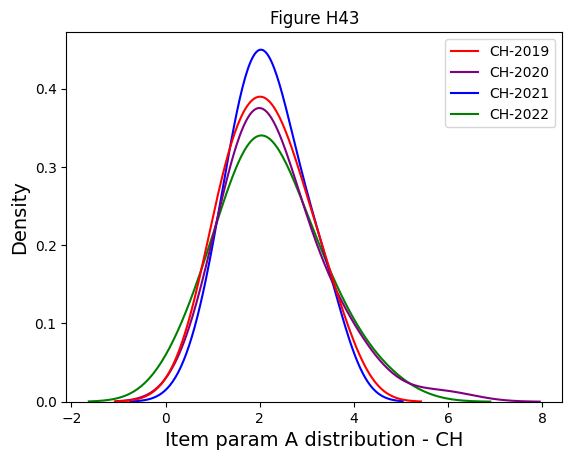

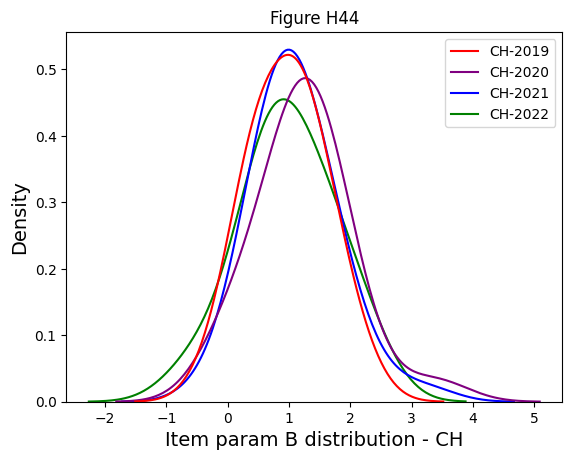

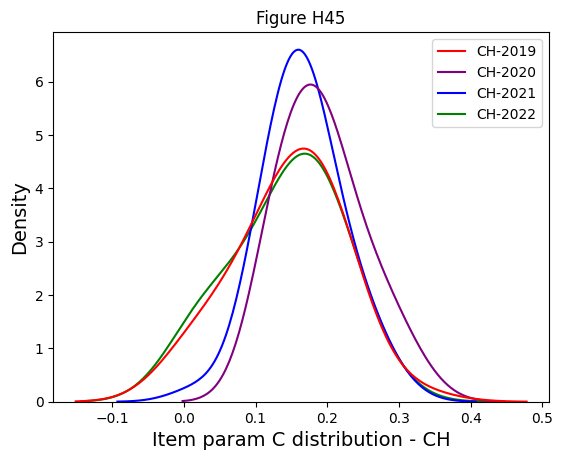

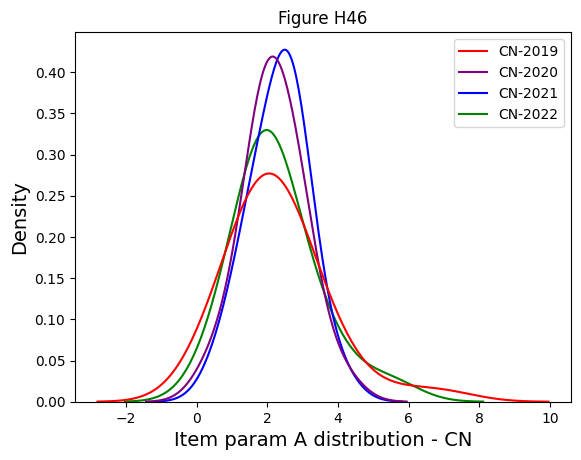

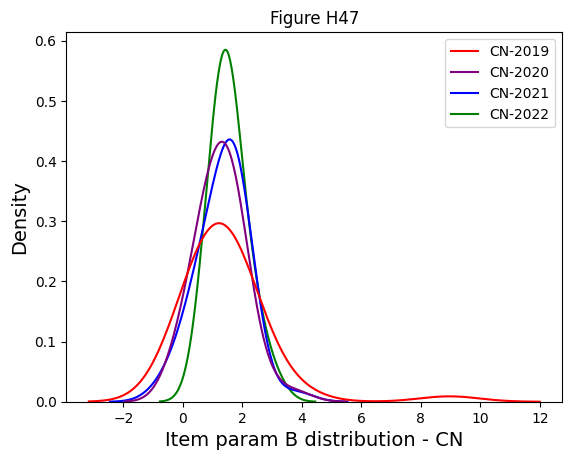

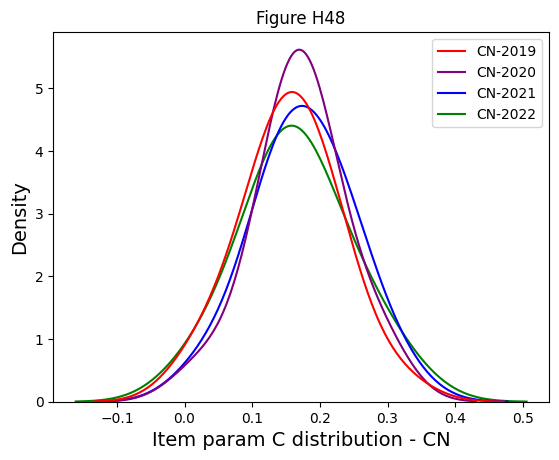

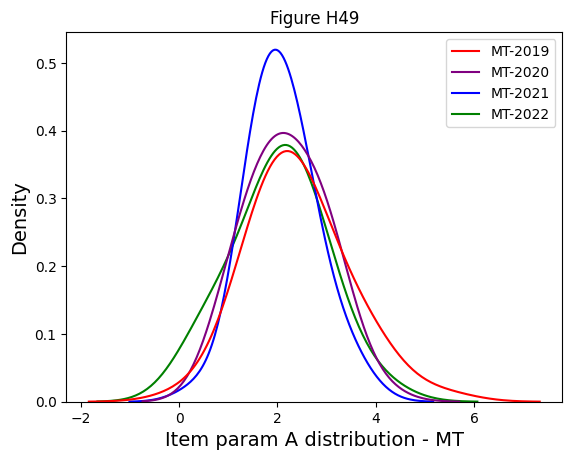

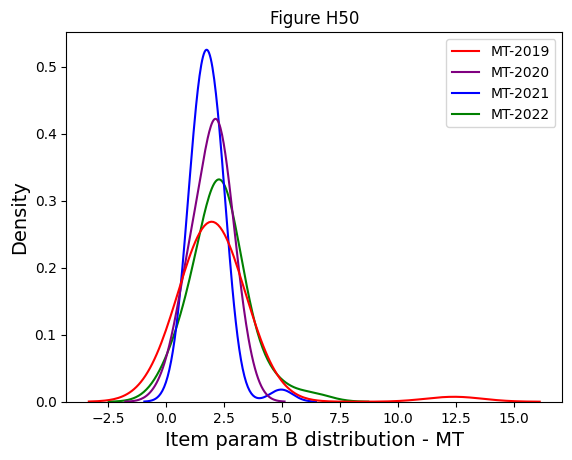

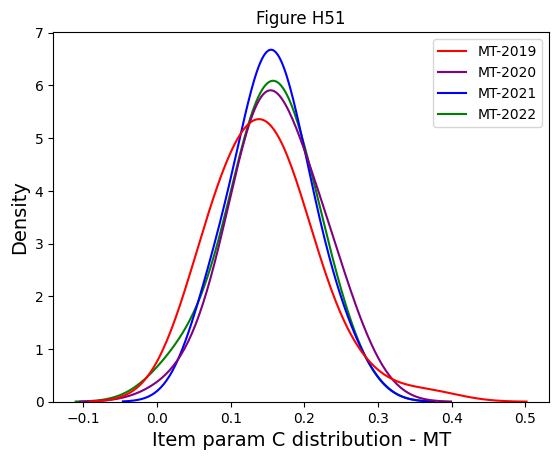

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for exam in ['CH', 'CN', 'MT']:
    for param in ['A', 'B', 'C']:
        curves = {}
        for year in [2019, 2020, 2021, 2022]:
            curves[f'{exam}-{year}'] = dic_human_itens[exam][year][f'NU_PARAM_{param}']
        
        g = sns.kdeplot(
            curves,
            bw_adjust=1.5,
            common_norm=False,  # Normalize each distribution independently
            palette=palette,
        );

        _ = plt.title("Figure " + notebook_type + str(figure_count))
        _ = plt.xlabel(f"Item param {param} distribution - {exam}", fontsize=14)
        _ = plt.ylabel("Density", fontsize=14)
        _ = plt.show()
        _ = plt.savefig(f'figures/dist-human-{exam}-enem-irt-scores.pdf', format='pdf',bbox_inches='tight')

        figure_count += 1